# Analysis Summary

This notebook provides answers to questions about the open-coding analysis process itself.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from IPython.display import display, Markdown
from lib.util import getCodes

Import all codes from the open coding process

In [2]:
%%time
codes = getCodes()

CPU times: user 35.4 s, sys: 110 ms, total: 35.5 s
Wall time: 35.8 s


Parse works cited section of the `README.md` document for more analysis information.

In [3]:
# See regular expression at regexr.com/4htcn
regxp = r'\n([^\n\.\#]+)\.\s\((\d{4}),\s(\w+)\s(\d+)\)\.\s([^\.]+\.)\s\*([\w\d\s]+)\*\.\sRetrieved from (.*)\n'
with open('README.md') as readme:
    content = readme.read();

citations = re.findall(regxp,content)
citations = pd.DataFrame(citations, columns=['journalist', 'year', 'month', 'date', 'article', 'organization', 'url'])
citations.head()

,journalist,year,month,date,article,organization,url
0,"Aldhous, Peter",2016,September,16,"""Shy Trumpers"" polling analysis.",BuzzFeed News,https://github.com/BuzzFeedNews/2016-09-shy-tr...
1,"Arthur, Rob",2015,July,30,Buster Posey MVP.,FiveThirtyEight,https://github.com/fivethirtyeight/data
2,"Bi, Frank",2016,Jan,13,Uber launch cities and date.,Forbes,https://github.com/voxmedia/data-projects
3,"Bradshaw, Paul",2019,April,6,Lack of electric car charging points 'putting ...,BBC,https://github.com/BBC-Data-Unit/electric-car-...
4,"Bradshaw, Paul",2019,March,8,Birmingham remains top destination for Londoners.,BBC,https://github.com/BBC-Data-Unit/internal-migr...


Also get the list of data journalism repos identified in `find_notebooks.ipynb`. 

In [4]:
repos = pd.read_csv('potential_notebooks.csv')
keepers = repos[repos.is_keeper == True]

## Analysis by the numbers

In [5]:
byTheNumbers = citations.loc[:,['journalist', 'organization', 'article']].describe().loc['unique',:].to_frame('count')
byTheNumbers = byTheNumbers.append(pd.DataFrame({
        'count': [ codes.code.nunique(), 
                   repos.shape[0],
                   keepers.shape[0],
                   keepers.org.nunique(),
                 ],
    }, index=['codes', 'repos', 'relevant repos', 'total organizations']))

byTheNumbers

,count
journalist,24
organization,21
article,38
codes,161
repos,1295
relevant repos,225
total organizations,50


## Progress towards convergence

In [6]:
codingOrder = pd.DataFrame({'article': [
    'awb-notebook',
    'skatemusic',
    'new-york-school-assessment',
    'lending-club',
    'auditData',
    '2019-ems-analysis',
    '2018-voter-registration',
    'federal_employees_trump_2017', 
    'infrastructure-jobs',
    'librarians',
    'midwife-led-units',
    'internal-migration-london',
    'electric-car-charging-points',
    'school-star-ratings-2018',
    'prison-admissions',
    'vox-central-line-infections',
    'verge-uber-launch-dates',
    'buster-posey-mvp',
    'work-from-home',
    'nyc-trips',
    'bob-ross',
    'bechdel',
    'employment-discrimination',
    '2015-11-refugees-in-the-united-states',
    'babyname_politics',
    'wikipedia-rankings',
    'Power_of_Irma',
    'Endangered-Species-Act-Louisiana',
    'california-h2a-visas-analysis',
    '2016-04-republican-donor-movements',
    'cube_root_law',
    '2016-09-shy-trumpers',
    '2018-05-31-crime-and-heat-analysis',
    '2016-11-bellwether-counties',
    'heat_and_humidity',
    '2018-voter-registration',
    'long-term-care-db',
    'census-hard-to-map-analysis',
    'california-crop-production-wages-analysis',
    'california-cc-score-analysis',
    '2019-04-democratic-candidate-codonors',
    'california-ccscore-analysis'
][::-1] }).reset_index().rename(columns={'index': 'coding order'})

Create a data frame of codes grouped by article.

In [7]:
codesByArticle = codes.groupby(['article']).code \
    .unique() \
    .to_frame('codes') \
    .reset_index() \
    .merge(codingOrder, on='article') \
    .sort_values('coding order') \
    .reset_index()

codesByArticle['cumulative count'] = 0

codeset = set()
for i, row in codesByArticle.iterrows():
    setDiff = set(row.codes).difference(codeset)
    codeset = codeset.union(setDiff)
    codesByArticle.loc[i, 'cumulative count'] = len(codeset)
    codesByArticle.loc[i, 'new codes'] = ', '.join(setDiff)

codesByArticle.head()

,index,article,codes,coding order,cumulative count,new codes
0,17,california-ccscore-analysis,"[format table display, read as tabular data, d...",0,23,"count number of records, export results, drop ..."
1,7,2019-04-democratic-candidate-codonors,"[use public data, read as tabular data, archit...",1,42,"sum column values, calculate scaled ratio, exp..."
2,18,california-crop-production-wages-analysis,"[use public data, format table display, constr...",3,45,"architect repeating process, construct table m..."
3,20,census-hard-to-map-analysis,"[wrangle data for graphics, use public data, c...",4,47,"slice column values, wrangle data for graphics"
4,30,long-term-care-db,"[count value frequency, calculate scaled ratio...",5,56,"perform name entity resolution manually, scrap..."


Plot the size of the code set as more computational notebooks are analyzed.

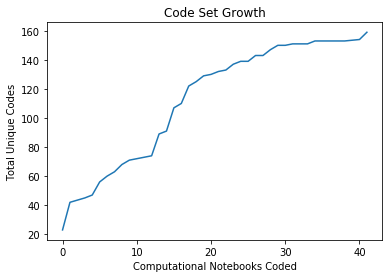

In [8]:
ax = sns.lineplot(x='coding order', y='cumulative count', markers=True, dashes=False, data=codesByArticle)
ax.set(xlabel='Computational Notebooks Coded', ylabel='Total Unique Codes', title='Code Set Growth')
plt.show()

Map codes back to the article where they were introduced to the code set.

In [9]:
for i, row in codesByArticle.iterrows():
    display(Markdown('{}. **{}**: {}'.format(i + 1, row.article, row['new codes'])))

1. **california-ccscore-analysis**: count number of records, export results, drop entirely duplicate rows, remove incomplete data, format table display, repetitive code, sort table, drop columns, calculate difference, calculate z-score, count value frequency, plot histogram, peek at data, calculate mean, adjust for season, filter rows, split, compute, and merge, inspect table schema, group by single column, change column data type, read as tabular data, calculate percentage difference, inner join tables

2. **2019-04-democratic-candidate-codonors**: sum column values, calculate scaled ratio, export intermediate results, prevent double-counting, union tables, group by multiple columns, self join table, remove with regular expression, change case, annotate workflow, create a semi-unique key, calculate ratio, strip whitespace, gather table, count unique values in column, outer join tables, canonicalize column names, architect a subroutine, use public data

3. **california-crop-production-wages-analysis**: architect repeating process, construct table manually, adjust for inflation

4. **census-hard-to-map-analysis**: slice column values, wrangle data for graphics

5. **long-term-care-db**: perform name entity resolution manually, scrape web for data, drop erroneous rows, use non-public, provided data, encode table identification in row, drop rows with duplicate value in one column, join with lookup table, fix data errors manually, construct pivot table

6. **2018-voter-registration**: pull tables out of pdf, plot stacked bar chart, extract single value, plot stacked column chart

7. **heat_and_humidity**: cartesian product, generate data computationally, compute index number

8. **2016-11-bellwether-counties**: spread table, calculate spread, create rolling window, use academic data, get max value

9. **2018-05-31-crime-and-heat-analysis**: combine seemingly disparate datasets, plot scatterplot, extract property from datetime

10. **2016-09-shy-trumpers**: use another news orgs data

11. **cube_root_law**: calculate using an external data structure

12. **2016-04-republican-donor-movements**: split column on delimiter

13. **california-h2a-visas-analysis**: geocode addresses, trim by date range, preserve existing values, split and compute, plot column chart, encoding provenance in data, trim by geographic area, replace na values, create a crosstab, omits data quality exploration, remove all rows but the master record, cache results from external service, temporary joining column, create a unique key, display entire table

14. **Endangered-Species-Act-Louisiana**: plot trendline, perform scalar multiplication

15. **Power_of_Irma**: toggle step on and off, log-ify values, find worst offender, fit a generalized linear model, tolerate dirty data, plot boxplot, plot violin plot, change date format, use previously cleaned data, select columns, find most frequently occurring, look for trends, fix incorrect calculation, value replacement, use data from colleague, set data confidence threshold

16. **wikipedia-rankings**: plot scree plot, analyze principle components, collect raw data

17. **babyname_politics**: check results of previous operation, break ties, peel and merge, concatenate columns into key, data loss from aggregation, natural join, round floating point, join aggregate, get unique values, resort after merge, assign ranks, trim by quantitative threshold

18. **2015-11-refugees-in-the-united-states**: compare total number of rows, designate column as primary key, make an incorrect conclusion

19. **employment-discrimination**: align table columns for consolidation, merge tables to create pivot table, concatenate files together, combine entities by string matching

20. **bechdel**: calculate median

21. **bob-ross**: run cluster analysis, whiten matrix

22. **nyc-trips**: full join tables

23. **work-from-home**: translate entity names manually, data too large for repo, create flag, test for equality

24. **buster-posey-mvp**: plot line chart, image analysis

25. **verge-uber-launch-dates**: 

26. **vox-central-line-infections**: report rows with column number discrepancies, remove delimiting characters, sort table rows, filter by contains value

27. **prison-admissions**: 

28. **school-star-ratings-2018**: pad column values, get min value, display rows with errors, reconcile primary keys between tables

29. **electric-car-charging-points**: add foreign key column, define edge weights, encode redundant information

30. **internal-migration-london**: 

31. **midwife-led-units**: test different computations for equality

32. **librarians**: 

33. **infrastructure-jobs**: 

34. **federal_employees_trump_2017**: create a table to lookup values, resolve to arbitrary entity name among choices

35. **2018-voter-registration**: 

36. **2019-ems-analysis**: 

37. **auditData**: 

38. **lending-club**: 

39. **skatemusic**: explore similarities and differences different groups

40. **awb-notebook**: summarize dataset, combine drifting datasets, silently dropping values after groupby, resolve by substring, backfill missing data